## HIERARCHICAL CLUSTERING

# UTILITIES


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score


In [ ]:
X_train = np.load("X_train_sax3.npy", allow_pickle=True)
X_test = np.load("X_test_sax3.npy", allow_pickle=True)
print(X_train.shape, X_test.shape)

(1828, 1, 100, 1) (624, 1, 100, 1)


In [ ]:
Y_train = pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv", skipinitialspace=True)
Y_test = pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv", skipinitialspace=True)
Y_train.shape, Y_test.shape

((1828, 9), (624, 9))

In [ ]:
X_train_arr=np.array(X_train)
X_train_rid=np.squeeze(X_train_arr)
X_test_arr=np.array(X_test)
X_test_rid=np.squeeze(X_test_arr)

# SINGLE

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6, linkage='single')
clustering.fit(X_train_rid)

AgglomerativeClustering(linkage='single', n_clusters=6)

In [ ]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.value_counts(clustering.labels_)

0    1823
4       1
5       1
3       1
1       1
2       1
dtype: int64

In [ ]:
def plot_dendrogram(clustering, **kwargs):
    """
    Funzione per la visualizzazione del dendrogramma del clustering gerarchico.
    Utilizza la libreria scipy per calcolare il dendrogramma.

    Parametri:
    - clustering: oggetto di clustering gerarchico già addestrato
    - **kwargs: argomenti opzionali da passare alla funzione dendrogram()
    """
    # Calcola la matrice di linkage utilizzando scipy
    linkage_matrix = linkage(clustering.children_)
    dendrogram(linkage_matrix, **kwargs)

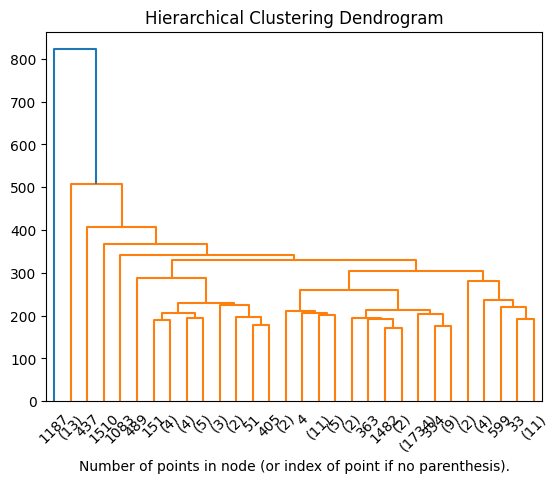

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering.labels_))
print('silhouette', silhouette_score(X_train_rid, clustering.labels_))

0    1823
4       1
5       1
3       1
1       1
2       1
dtype: int64
silhouette 0.7895046541336123


# COMPLETE

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering1 = AgglomerativeClustering(n_clusters=6, linkage='complete')
clustering1.fit(X_train_rid)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [ ]:
clustering1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pd.value_counts(clustering1.labels_)

1    1811
0       8
5       5
2       2
3       1
4       1
dtype: int64

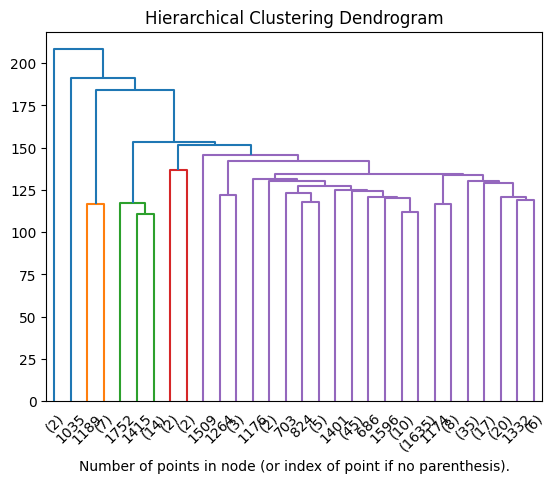

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering1, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering1.labels_))
print('silhouette', silhouette_score(X_train_rid, clustering1.labels_))

1    1811
0       8
5       5
2       2
3       1
4       1
dtype: int64
silhouette 0.7621003751334711


# #AVERAGE

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering2 = AgglomerativeClustering(n_clusters=6, linkage='average')
clustering2.fit(X_train_rid)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [ ]:
clustering2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.value_counts(clustering2.labels_)

0    1823
3       1
4       1
5       1
2       1
1       1
dtype: int64

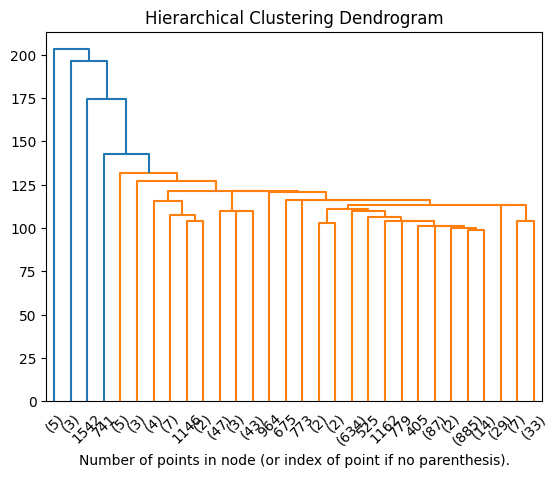

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering2, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering2.labels_))
print('silhouette', silhouette_score(X_train_rid, clustering2.labels_))

0    1823
3       1
4       1
5       1
2       1
1       1
dtype: int64
silhouette 0.7928608382365876


# WARD

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering3 = AgglomerativeClustering(n_clusters=6, linkage='ward')
clustering3.fit(X_train_rid)

AgglomerativeClustering(n_clusters=6)

In [ ]:
clustering3.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.value_counts(clustering3.labels_)

0    1802
1      12
3       7
5       3
2       3
4       1
dtype: int64

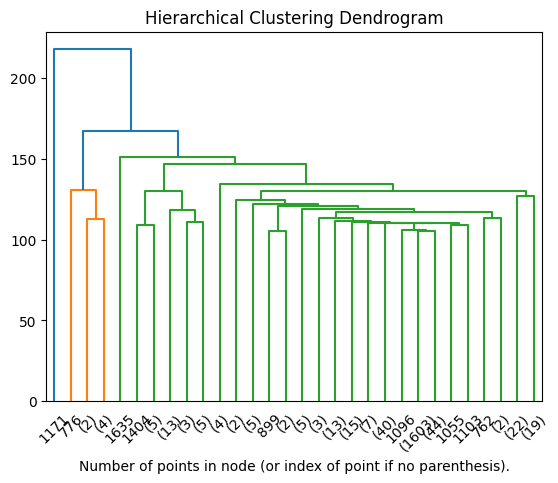

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering3, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering3.labels_))
print('silhouette', silhouette_score(X_train_rid, clustering3.labels_))

0    1802
1      12
3       7
5       3
2       3
4       1
dtype: int64
silhouette 0.741874588138264
